# 时间序列回归

时间序列分析模型建立了观察结果与时间变化的关系，能帮我们预测未来一段时间内的结果变化情况。

* 回归分析训练得到的是目标变量 y 与自变量 x（一个或多个）的相关性，然后通过新的自变量 x 来预测目标变量 y。
* 时间序列分析得到的是目标变量 y 与时间的相关性。

* 回归分析擅长的是多变量与目标结果之间的分析，即便是单一变量，也往往与时间无关。
* 时间序列分析建立在时间变化的基础上，它会分析目标变量的趋势、周期、时期和不稳定因素等。这些趋势和周期都是在时间维度的基础上，我们要观察的重要特征。


# 时间序列预测分类


* AR 的英文全称叫做 Auto Regressive，中文叫自回归模型。这个算法的思想比较简单，它认为过去若干时刻的点通过线性组合，再加上白噪声就可以预测未来某个时刻的点。

> 在我们日常生活环境中就存在白噪声，在数据挖掘的过程中，你可以把它理解为一个期望为 0，方差为常数的纯随机过程。AR 模型还存在一个阶数，称为 AR（p）模型，也叫作 p 阶自回归模型。它指的是通过这个时刻点的前 p 个点，通过线性组合再加上白噪声来预测当前时刻点的值。

* MA 的英文全称叫做 Moving Average，中文叫做滑动平均模型。它与 AR 模型大同小异，AR 模型是历史时序值的线性组合，MA 是通过历史白噪声进行线性组合来影响当前时刻点。AR 模型中的历史白噪声是通过影响历史时序值，从而间接影响到当前时刻点的预测值。同样 MA 模型也存在一个阶数，称为 MA(q) 模型，也叫作 q 阶移动平均模型。我们能看到 AR 和 MA 模型都存在阶数，在 AR 模型中，我们用 p 表示，在 MA 模型中我们用 q 表示，这两个模型大同小异，与 AR 模型不同的是 MA 模型是历史白噪声的线性组合。

* ARMA 的英文全称是 Auto Regressive Moving Average，中文叫做自回归滑动平均模型，也就是 AR 模型和 MA 模型的混合。相比 AR 模型和 MA 模型，它有更准确的估计。同样 ARMA 模型存在 p 和 q 两个阶数，称为 ARMA(p,q) 模型。

> ARIMA 的英文全称是 Auto Regressive Integrated Moving Average 模型，中文叫差分自回归滑动平均模型，也叫求合自回归滑动平均模型。相比于 ARMA，ARIMA 多了一个差分的过程，作用是对不平稳数据进行差分平稳，在差分平稳后再进行建模。ARIMA 的原理和 ARMA 模型一样。相比于 ARMA(p,q) 的两个阶数，ARIMA 是一个三元组的阶数 (p,d,q)，称为 ARIMA(p,d,q) 模型。其中 d 是差分阶数。

# sklearn实现


```python

from statsmodels.tsa.arima_model import ARMA

ARMA(endog,order,exog=None)
```

* endog：英文是 endogenous variable，代表内生变量，又叫非政策性变量，它是由模型决定的，不被政策左右，可以说是我们想要分析的变量，或者说是我们这次项目中需要用到的变量。

* order：代表是 p 和 q 的值，也就是 ARMA 中的阶数。

* exog：英文是 exogenous variables，代表外生变量。外生变量和内生变量一样是经济模型中的两个重要变量。相对于内生变量而言，外生变量又称作为政策性变量，在经济机制内受外部因素的影响，不是我们模型要研究的变量。


In [6]:
# 用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')


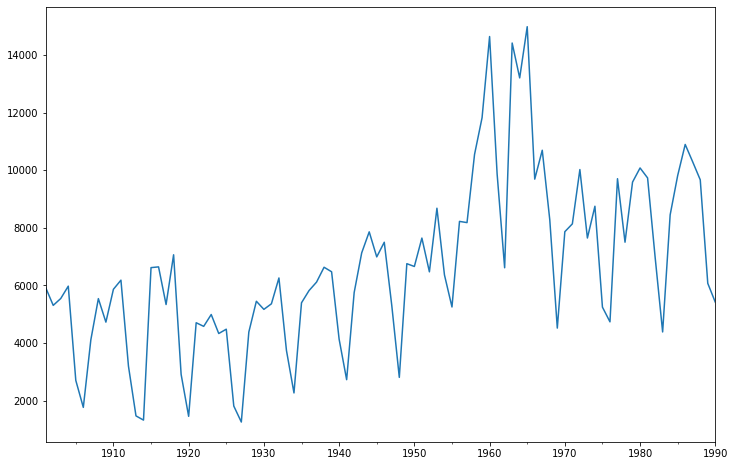

In [8]:
# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()

In [9]:
# 创建ARMA模型# 创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print('AIC: %0.4lf' %arma.aic)
# 模型预测
predict_y = arma.predict('1990', '2000')

AIC: 1619.6323


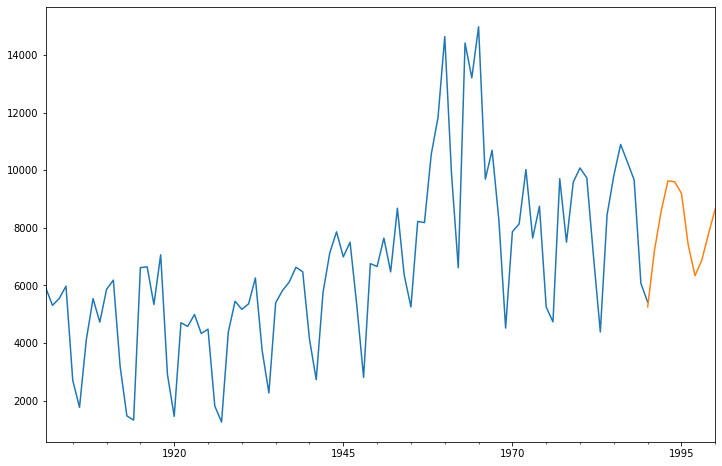

In [10]:
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()

# 比特币时间序列预测

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
plt.rcParams['font.sans-serif']=['Heiti TC']# 显示中文字体
from datetime import datetime
warnings.filterwarnings('ignore')

In [12]:
data=pd.read_csv('bitcoin_2012-01-01_to_2018-10-31.csv')

In [13]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011/12/31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012/1/1,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012/1/2,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012/1/3,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012/1/4,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 8 columns):
Timestamp            2497 non-null object
Open                 2494 non-null float64
High                 2494 non-null float64
Low                  2494 non-null float64
Close                2494 non-null float64
Volume_(BTC)         2494 non-null float64
Volume_(Currency)    2494 non-null float64
Weighted_Price       2494 non-null float64
dtypes: float64(7), object(1)
memory usage: 156.1+ KB


In [27]:
data.Timestamp=pd.to_datetime(data.Timestamp)
data.index = data.Timestamp
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159


In [28]:
# 按照月，季度，年来统计
data_month = data.resample('M').mean()
data_Q =data.resample('Q-DEC').mean()
data_year = data.resample('A-DEC').mean()

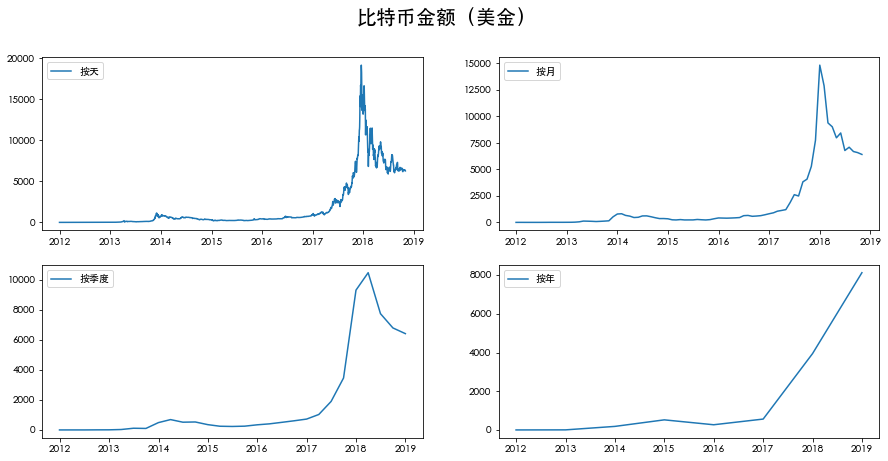

In [30]:
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
plt.plot(data.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(data_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(data_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(data_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()

In [32]:
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(data_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())
# 比特币预测

参数错误: (0, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.764
Date:                Sat, 28 Mar 2020   AIC                           1385.522
Time:                        01:11:24   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2101.3646   1567.274      1.341      0.184    -970.435    5173.165
ar.L1.Weighted_Price     0.9251      0.042     22.043      0.000       0.843     

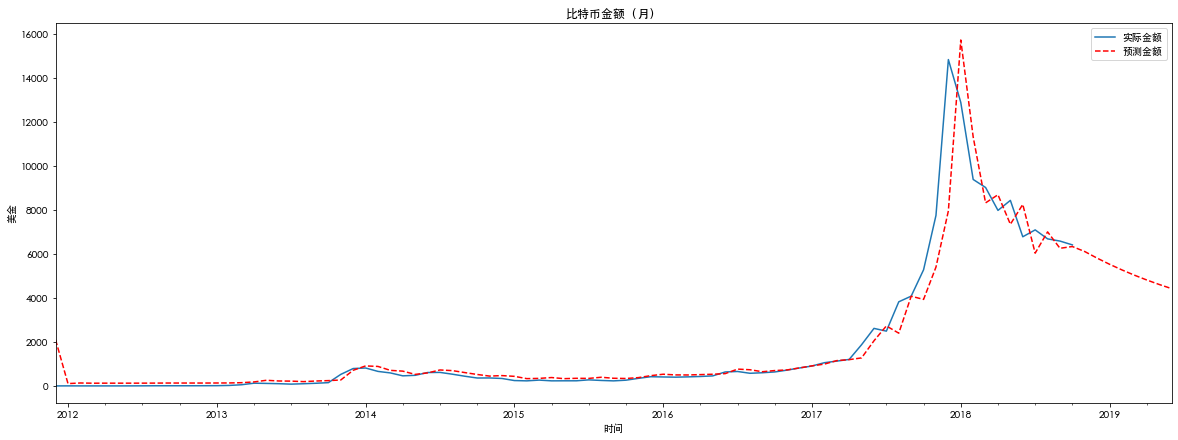

In [34]:
data_month2 = data_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= data_month.columns)
data_month2 = pd.concat([data_month2, future])
data_month2['forecast'] = best_model.predict(start=0, end=91)
# 比特币预测结果显示
plt.figure(figsize=(20,7))
data_month2.Weighted_Price.plot(label='实际金额')
data_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()